In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

# import the packages
import numpy as np
from scipy.optimize import minimize
import scipy.stats as stats
import time

In [2]:
def generate_dataset_simple(beta, n, std_dev):
    # Generate x as an array of `n` samples which can take a value between 0 and 100
    x = np.random.rand(n) * 100
    # Generate the random error of n samples, with a random value from a normal distribution, with a standard
    # deviation provided in the function argument
    e = np.random.randn(n) * std_dev
    # Calculate `y` according to the equation discussed
    y = x * beta + e
    return x, y

In [3]:
x,y = generate_dataset_simple(15, 50, 100)

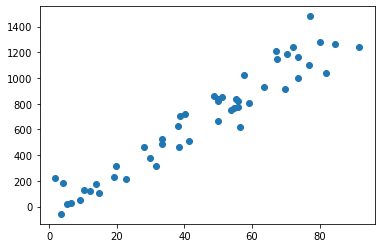

In [4]:
plt.scatter(x,y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=42)

print("length of train sample: ", len(X_train))
print("length of test sample: ", len(X_test))

length of train sample:  33
length of test sample:  17


In [6]:
#   define a function to calculate the log likelihood
def calcLogLikelihood(guess, true, n):
    error = true-guess
    sigma = np.std(error)
    f = ((1.0/(2.0*math.pi*sigma*sigma))**(n/2))* \
        np.exp(-1*((np.dot(error.T,error))/(2*sigma*sigma)))
    return np.log(f)

In [7]:
def neg_loglike(theta):
    beta = theta[:-1]
    sigma = theta[-1]
    mu = np.dot(x,beta)
    ll = -N/2 * np.log(2*np.pi*sigma**2) - (1/(2*sigma**2)) * np.sum((y - mu)**2)
    return -1 * ll

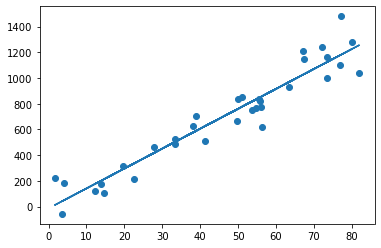

In [8]:
import numpy as np
from scipy.optimize import minimize

def lik(parameters):
    m = parameters[0]
    b = parameters[1]
    sigma = parameters[2]
    for i in np.arange(0, len(x)):
        y_exp = m * x + b
    L = (len(x)/2 * np.log(2 * np.pi) + len(x)/2 * np.log(sigma ** 2) + 1 /
         (2 * sigma ** 2) * sum((y - y_exp) ** 2))
    return L

# x = np.array([1,2,3,4,5])
# y = np.array([2,5,8,11,14])

x = X_train
y = y_train


lik_model = minimize(lik, np.array([1,1,1]), method='L-BFGS-B')
plt.scatter(x,y)
plt.plot(x, lik_model['x'][0] * x + lik_model['x'][1])
plt.show()

In [9]:
lik_model

      fun: 204.28837294863285
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([0., 0., 0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 184
      nit: 43
   status: 0
  success: True
        x: array([ 15.48460141, -13.73852085, 118.11053653])

In [10]:
from __future__ import division

from matplotlib import  pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from statsmodels.base.model import GenericLikelihoodModel

np.random.seed(123456789)

In [11]:
pi = 0.3
lambda_ = 2.

In [12]:
def zip_pmf(x, pi=pi, lambda_=lambda_):
    if pi < 0 or pi > 1 or lambda_ <= 0:
        return np.zeros_like(x)
    else:
        return (x == 0) * pi + (1 - pi) * stats.poisson.pmf(x, lambda_)

In [13]:
N = 1000

inflated_zero = stats.bernoulli.rvs(pi, size=N)
x = (1 - inflated_zero) * stats.poisson.rvs(lambda_, size=N)

In [14]:
class ZeroInflatedPoisson(GenericLikelihoodModel):
    def __init__(self, endog, exog=None, **kwds):
        if exog is None:
            exog = np.zeros_like(endog)
            
        super(ZeroInflatedPoisson, self).__init__(endog, exog, **kwds)
    
    def nloglikeobs(self, params):
        pi = params[0]
        lambda_ = params[1]

        return -np.log(zip_pmf(self.endog, pi=pi, lambda_=lambda_))
    
    def fit(self, start_params=None, maxiter=10000, maxfun=5000, **kwds):
        if start_params is None:
            lambda_start = self.endog.mean()
            excess_zeros = (self.endog == 0).mean() - stats.poisson.pmf(0, lambda_start)
            
            start_params = np.array([excess_zeros, lambda_start])
            
        return super(ZeroInflatedPoisson, self).fit(start_params=start_params,
                                                    maxiter=maxiter, maxfun=maxfun, **kwds)

In [15]:
model = ZeroInflatedPoisson(x)
results = model.fit()

Optimization terminated successfully.
         Current function value: 1.586641
         Iterations: 37
         Function evaluations: 70


In [16]:
pi_mle, lambda_mle = results.params

pi_mle, lambda_mle

(0.31542487710071976, 2.0451304204850853)

In [17]:
boot_mean, boot_std, boot_samples = results.bootstrap(nrep=500, store=True)
boot_pis = boot_samples[:, 0]
boot_lambdas = boot_samples[:, 1]

<class '__main__.ZeroInflatedPoisson'>


In [18]:
import math
import numpy as np
x = np.linspace(0.0,10.0, num=100)
a = 4.0
b = -3.5
c = 0.0
y = (a*(x**2)) + (b*x) + c

#   let's add noise to the data
#   np.random.normal(mean, standardDeviation, num)
noise = np.random.normal(0, 10., 100)
y = y+noise

In [19]:
np.save('myData.npy',[x,y])

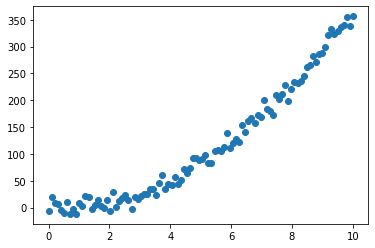

In [20]:
plt.scatter(x,y)

In [21]:
#   define a function to calculate the log likelihood
def calcLogLikelihood(guess, true, n):
    error = true-guess
    sigma = np.std(error)
    f = ((1.0/(2.0*math.pi*sigma*sigma))**(n/2))* \
        np.exp(-1*((np.dot(error.T,error))/(2*sigma*sigma)))
    return np.log(f)

In [22]:
#   define my function which will return the objective function to be minimized
def myFunction(var):
    #   load my  data
    [x, y] = np.load('myData.npy')
    yGuess = (var[2]*(x**2)) + (var[1]*x) + var[0]
    f = calcLogLikelihood(yGuess, y, float(len(yGuess)))
    return (-1*f)

In [23]:
#  Let's pick some random starting points for the optimization    
nvar = 3
var = np.zeros(nvar)
var[0] = -15.5
var[1] = 19.5
var[2] = -1.0

#   let's maximize the likelihood (minimize -1*max(likelihood)
from scipy.optimize import minimize
res = minimize(myFunction, var, method='BFGS',options={'disp': True})

         Current function value: 374.257781
         Iterations: 16
         Function evaluations: 161
         Gradient evaluations: 32


In [24]:
#   perform least squares fit using scikitlearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression(fit_intercept=False))])

model = model.fit(x[:, np.newaxis], y)
coefs = model.named_steps['linear'].coef_

In [25]:
coefs

array([ 0.99706944, -3.77781195,  4.02712961])

In [26]:
coef_ = res['x']
y_hat = (coef_[2]*(x**2)) + (coef_[1]*x) + coef_[0]

y_hat_ = (coefs[2]*(x**2)) + (coefs[1]*x) + coefs[0]

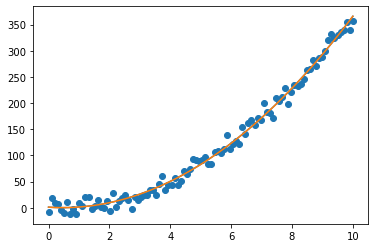

In [27]:
plt.scatter(x,y)
plt.plot(x,y_hat)
plt.plot(x,y_hat_)
plt.show()

In [28]:
import numpy as np
from numpy import exp
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import factorial
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
from statsmodels.api import Poisson
from scipy import stats
from scipy.stats import norm
from statsmodels.iolib.summary2 import summary_col

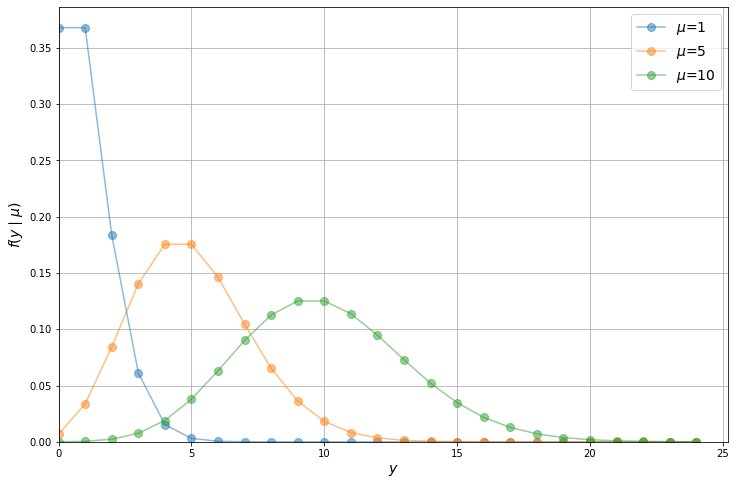

In [29]:
poisson_pmf = lambda y, μ: μ**y / factorial(y) * exp(-μ)
y_values = range(0, 25)

fig, ax = plt.subplots(figsize=(12, 8))

for μ in [1, 5, 10]:
    distribution = []
    for y_i in y_values:
        distribution.append(poisson_pmf(y_i, μ))
    ax.plot(y_values,
            distribution,
            label=f'$\mu$={μ}',
            alpha=0.5,
            marker='o',
            markersize=8)

ax.grid()
ax.set_xlabel('$y$', fontsize=14)
ax.set_ylabel('$f(y \mid \mu)$', fontsize=14)
ax.axis(xmin=0, ymin=0)
ax.legend(fontsize=14)

plt.show()

In [30]:
pd.options.display.max_columns = 10

# Load in data and view
df = pd.read_stata('data/fp.dta')
df.head()

,country,ccode,year,cyear,numbil,...,topint08,rintr,noyrs,roflaw,nrrents
0,United States,2.0,1990.0,21990.0,NaN,...,39.799999,4.988405,20.0,1.61,NaN
1,United States,2.0,1991.0,21991.0,NaN,...,39.799999,4.988405,20.0,1.61,NaN
2,United States,2.0,1992.0,21992.0,NaN,...,39.799999,4.988405,20.0,1.61,NaN
3,United States,2.0,1993.0,21993.0,NaN,...,39.799999,4.988405,20.0,1.61,NaN
4,United States,2.0,1994.0,21994.0,NaN,...,39.799999,4.988405,20.0,1.61,NaN


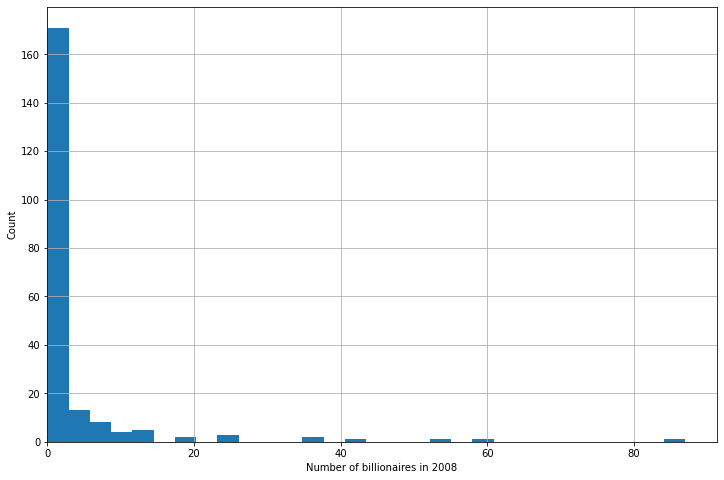

In [31]:
numbil0_2008 = df[(df['year'] == 2008) & (
    df['country'] != 'United States')].loc[:, 'numbil0']

plt.subplots(figsize=(12, 8))
plt.hist(numbil0_2008, bins=30)
plt.xlim(left=0)
plt.grid()
plt.xlabel('Number of billionaires in 2008')
plt.ylabel('Count')
plt.show()

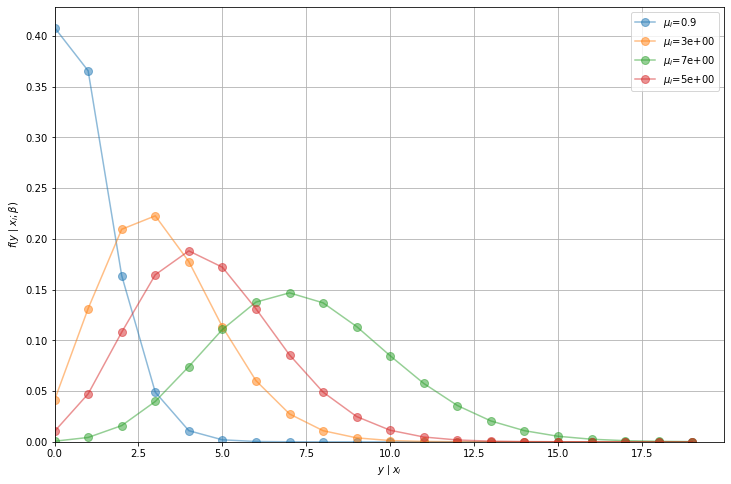

In [32]:
y_values = range(0, 20)

# Define a parameter vector with estimates
β = np.array([0.26, 0.18, 0.25, -0.1, -0.22])

# Create some observations X
datasets = [np.array([0, 1, 1, 1, 2]),
            np.array([2, 3, 2, 4, 0]),
            np.array([3, 4, 5, 3, 2]),
            np.array([6, 5, 4, 4, 7])]


fig, ax = plt.subplots(figsize=(12, 8))

for X in datasets:
    μ = exp(X @ β)
    distribution = []
    for y_i in y_values:
        distribution.append(poisson_pmf(y_i, μ))
    ax.plot(y_values,
            distribution,
            label=f'$\mu_i$={μ:.1}',
            marker='o',
            markersize=8,
            alpha=0.5)

ax.grid()
ax.legend()
ax.set_xlabel('$y \mid x_i$')
ax.set_ylabel(r'$f(y \mid x_i; \beta )$')
ax.axis(xmin=0, ymin=0)
plt.show()

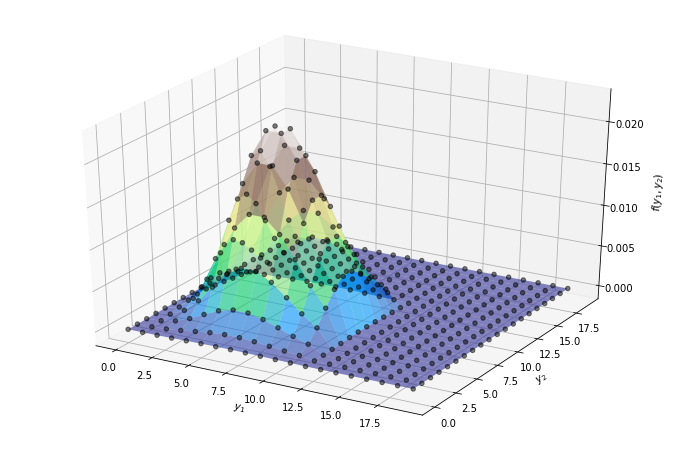

In [33]:
def plot_joint_poisson(μ=7, y_n=20):
    yi_values = np.arange(0, y_n, 1)

    # Create coordinate points of X and Y
    X, Y = np.meshgrid(yi_values, yi_values)

    # Multiply distributions together
    Z = poisson_pmf(X, μ) * poisson_pmf(Y, μ)

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z.T, cmap='terrain', alpha=0.6)
    ax.scatter(X, Y, Z.T, color='black', alpha=0.5, linewidths=1)
    ax.set(xlabel='$y_1$', ylabel='$y_2$')
    ax.set_zlabel('$f(y_1, y_2)$', labelpad=10)
    plt.show()

plot_joint_poisson(μ=7, y_n=20)

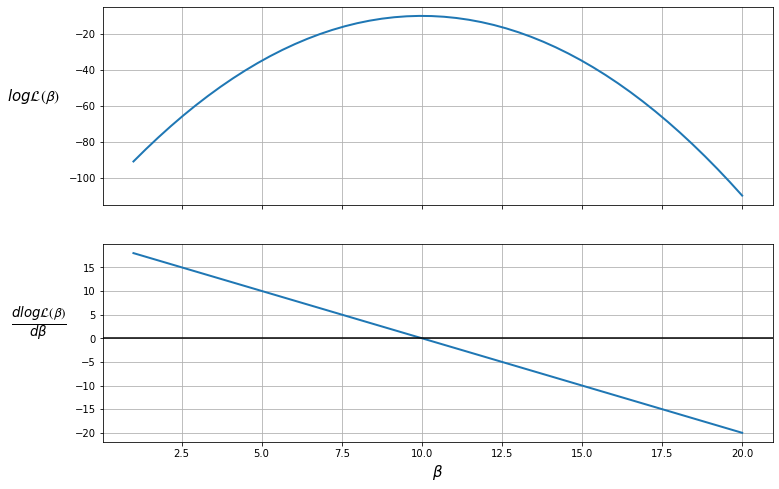

In [34]:
β = np.linspace(1, 20)
logL = -(β - 10) ** 2 - 10
dlogL = -2 * β + 20

fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12, 8))

ax1.plot(β, logL, lw=2)
ax2.plot(β, dlogL, lw=2)

ax1.set_ylabel(r'$log \mathcal{L(\beta)}$',
               rotation=0,
               labelpad=35,
               fontsize=15)
ax2.set_ylabel(r'$\frac{dlog \mathcal{L(\beta)}}{d \beta}$ ',
               rotation=0,
               labelpad=35,
               fontsize=19)
ax2.set_xlabel(r'$\beta$', fontsize=15)
ax1.grid(), ax2.grid()
plt.axhline(c='black')
plt.show()

In [35]:
class PoissonRegression:

    def __init__(self, y, X, β):
        self.X = X
        self.n, self.k = X.shape
        # Reshape y as a n_by_1 column vector
        self.y = y.reshape(self.n,1)
        # Reshape β as a k_by_1 column vector
        self.β = β.reshape(self.k,1)

    def μ(self):
        return np.exp(self.X @ self.β)

    def logL(self):
        y = self.y
        μ = self.μ()
        return np.sum(y * np.log(μ) - μ - np.log(factorial(y)))

    def G(self):
        y = self.y
        μ = self.μ()
        return X.T @ (y - μ)

    def H(self):
        X = self.X
        μ = self.μ()
        return -(X.T @ (μ * X))

In [36]:
def newton_raphson(model, tol=1e-3, max_iter=1000, display=True):

    i = 0
    error = 100  # Initial error value

    # Print header of output
    if display:
        header = f'{"Iteration_k":<13}{"Log-likelihood":<16}{"θ":<60}'
        print(header)
        print("-" * len(header))

    # While loop runs while any value in error is greater
    # than the tolerance until max iterations are reached
    while np.any(error > tol) and i < max_iter:
        H, G = model.H(), model.G()
        β_new = model.β - (np.linalg.inv(H) @ G)
        error = β_new - model.β
        model.β = β_new

        # Print iterations
        if display:
            β_list = [f'{t:.3}' for t in list(model.β.flatten())]
            update = f'{i:<13}{model.logL():<16.8}{β_list}'
            print(update)

        i += 1

    print(f'Number of iterations: {i}')
    print(f'β_hat = {model.β.flatten()}')

    # Return a flat array for β (instead of a k_by_1 column vector)
    return model.β.flatten()

In [37]:
X = np.array([[1, 2, 5],
              [1, 1, 3],
              [1, 4, 2],
              [1, 5, 2],
              [1, 3, 1]])

y = np.array([1, 0, 1, 1, 0])

# Take a guess at initial βs
init_β = np.array([0.1, 0.1, 0.1])

# Create an object with Poisson model values
poi = PoissonRegression(y, X, β=init_β)

# Use newton_raphson to find the MLE
β_hat = newton_raphson(poi, display=True)

Iteration_k  Log-likelihood  θ                                                           
-----------------------------------------------------------------------------------------
0            -4.3447622      ['-1.49', '0.265', '0.244']
1            -3.5742413      ['-3.38', '0.528', '0.474']
2            -3.3999526      ['-5.06', '0.782', '0.702']
3            -3.3788646      ['-5.92', '0.909', '0.82']
4            -3.3783559      ['-6.07', '0.933', '0.843']
5            -3.3783555      ['-6.08', '0.933', '0.843']
Number of iterations: 6
β_hat = [-6.07848205  0.93340226  0.84329625]


In [38]:
poi.G()

array([[-3.95169228e-07],
       [-1.00114805e-06],
       [-7.73114562e-07]])

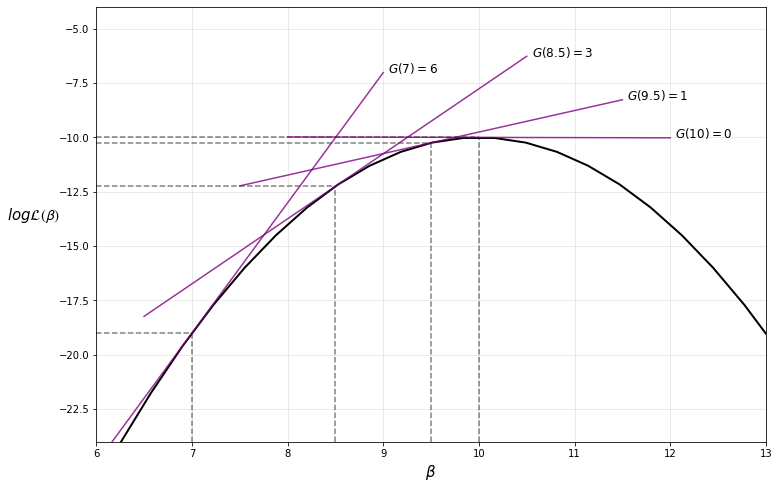

In [39]:
logL = lambda x: -(x - 10) ** 2 - 10

def find_tangent(β, a=0.01):
    y1 = logL(β)
    y2 = logL(β+a)
    x = np.array([[β, 1], [β+a, 1]])
    m, c = np.linalg.lstsq(x, np.array([y1, y2]), rcond=None)[0]
    return m, c

β = np.linspace(2, 18)
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(β, logL(β), lw=2, c='black')

for β in [7, 8.5, 9.5, 10]:
    β_line = np.linspace(β-2, β+2)
    m, c = find_tangent(β)
    y = m * β_line + c
    ax.plot(β_line, y, '-', c='purple', alpha=0.8)
    ax.text(β+2.05, y[-1], f'$G({β}) = {abs(m):.0f}$', fontsize=12)
    ax.vlines(β, -24, logL(β), linestyles='--', alpha=0.5)
    ax.hlines(logL(β), 6, β, linestyles='--', alpha=0.5)

ax.set(ylim=(-24, -4), xlim=(6, 13))
ax.set_xlabel(r'$\beta$', fontsize=15)
ax.set_ylabel(r'$log \mathcal{L(\beta)}$',
               rotation=0,
               labelpad=25,
               fontsize=15)
ax.grid(alpha=0.3)
plt.show()

In [40]:
X = np.array([[1, 2, 5],
              [1, 1, 3],
              [1, 4, 2],
              [1, 5, 2],
              [1, 3, 1]])

y = np.array([1, 0, 1, 1, 0])

stats_poisson = Poisson(y, X).fit()
print(stats_poisson.summary())

Optimization terminated successfully.
         Current function value: 0.675671
         Iterations 7
                          Poisson Regression Results                          
Dep. Variable:                      y   No. Observations:                    5
Model:                        Poisson   Df Residuals:                        2
Method:                           MLE   Df Model:                            2
Date:                Wed, 24 Jun 2020   Pseudo R-squ.:                  0.2546
Time:                        01:47:05   Log-Likelihood:                -3.3784
converged:                       True   LL-Null:                       -4.5325
Covariance Type:            nonrobust   LLR p-value:                    0.3153
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.0785      5.279     -1.151      0.250     -16.425       4.268
x1             0.9334      0.

In [41]:
df = df[df['year'] == 2008]

# Add a constant
df['const'] = 1

# Variable sets
reg1 = ['const', 'lngdppc', 'lnpop', 'gattwto08']
reg2 = ['const', 'lngdppc', 'lnpop',
        'gattwto08', 'lnmcap08', 'rintr', 'topint08']
reg3 = ['const', 'lngdppc', 'lnpop', 'gattwto08', 'lnmcap08',
        'rintr', 'topint08', 'nrrents', 'roflaw']

In [42]:
# Specify model
poisson_reg = sm.Poisson(df[['numbil0']], df[reg1],
                         missing='drop').fit(cov_type='HC0')
print(poisson_reg.summary())

Optimization terminated successfully.
         Current function value: 2.226090
         Iterations 9
                          Poisson Regression Results                          
Dep. Variable:                numbil0   No. Observations:                  197
Model:                        Poisson   Df Residuals:                      193
Method:                           MLE   Df Model:                            3
Date:                Wed, 24 Jun 2020   Pseudo R-squ.:                  0.8574
Time:                        01:47:05   Log-Likelihood:                -438.54
converged:                       True   LL-Null:                       -3074.7
Covariance Type:                  HC0   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -29.0495      2.578    -11.268      0.000     -34.103     -23.997
lngdppc        1.0839      0.

In [43]:
regs = [reg1, reg2, reg3]
reg_names = ['Model 1', 'Model 2', 'Model 3']
info_dict = {'Pseudo R-squared': lambda x: f"{x.prsquared:.2f}",
             'No. observations': lambda x: f"{int(x.nobs):d}"}
regressor_order = ['const',
                   'lngdppc',
                   'lnpop',
                   'gattwto08',
                   'lnmcap08',
                   'rintr',
                   'topint08',
                   'nrrents',
                   'roflaw']
results = []

for reg in regs:
    result = sm.Poisson(df[['numbil0']], df[reg],
                        missing='drop').fit(cov_type='HC0',
                                            maxiter=100, disp=0)
    results.append(result)

results_table = summary_col(results=results,
                            float_format='%0.3f',
                            stars=True,
                            model_names=reg_names,
                            info_dict=info_dict,
                            regressor_order=regressor_order)
results_table.add_title('Table 1 - Explaining the Number of Billionaires \
                        in 2008')
print(results_table)

Table 1 - Explaining the Number of Billionaires                         in 2008
                  Model 1    Model 2    Model 3  
-------------------------------------------------
const            -29.050*** -19.444*** -20.858***
                 (2.578)    (4.820)    (4.255)   
lngdppc          1.084***   0.717***   0.737***  
                 (0.138)    (0.244)    (0.233)   
lnpop            1.171***   0.806***   0.929***  
                 (0.097)    (0.213)    (0.195)   
gattwto08        0.006      0.007      0.004     
                 (0.007)    (0.006)    (0.006)   
lnmcap08                    0.399**    0.286*    
                            (0.172)    (0.167)   
rintr                       -0.010     -0.009    
                            (0.010)    (0.010)   
topint08                    -0.051***  -0.058*** 
                            (0.011)    (0.012)   
nrrents                                -0.005    
                                       (0.010)   
roflaw              

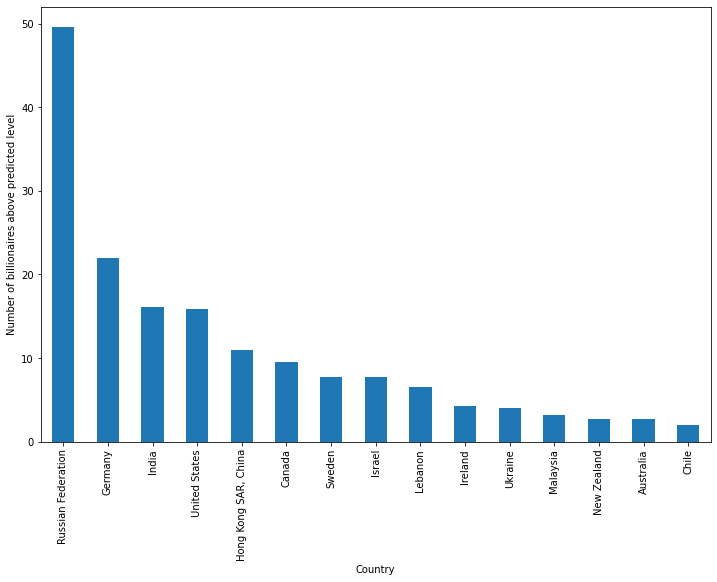

In [44]:
data = ['const', 'lngdppc', 'lnpop', 'gattwto08', 'lnmcap08', 'rintr',
        'topint08', 'nrrents', 'roflaw', 'numbil0', 'country']
results_df = df[data].dropna()

# Use last model (model 3)
results_df['prediction'] = results[-1].predict()

# Calculate difference
results_df['difference'] = results_df['numbil0'] - results_df['prediction']

# Sort in descending order
results_df.sort_values('difference', ascending=False, inplace=True)

# Plot the first 15 data points
results_df[:15].plot('country', 'difference', kind='bar',
                    figsize=(12,8), legend=False)
plt.ylabel('Number of billionaires above predicted level')
plt.xlabel('Country')
plt.show()

In [45]:
from statsmodels.discrete.discrete_model import Probit

In [46]:
class ProbitRegression:

    def __init__(self, y, X, β):
        self.X, self.y, self.β = X, y, β
        self.n, self.k = X.shape

    def μ(self):
        return norm.cdf(self.X @ self.β.T)

    def ϕ(self):
        return norm.pdf(self.X @ self.β.T)

    def logL(self):
        μ = self.μ()
        return np.sum(y * np.log(μ) + (1 - y) * np.log(1 - μ))

    def G(self):
        μ = self.μ()
        ϕ = self.ϕ()
        return np.sum((X.T * y * ϕ / μ - X.T * (1 - y) * ϕ / (1 - μ)),
                     axis=1)

    def H(self):
        X = self.X
        β = self.β
        μ = self.μ()
        ϕ = self.ϕ()
        a = (ϕ + (X @ β.T) * μ) / μ**2
        b = (ϕ - (X @ β.T) * (1 - μ)) / (1 - μ)**2
        return -(ϕ * (y * a + (1 - y) * b) * X.T) @ X

In [47]:
X = np.array([[1, 2, 4],
              [1, 1, 1],
              [1, 4, 3],
              [1, 5, 6],
              [1, 3, 5]])

y = np.array([1, 0, 1, 1, 0])

# Take a guess at initial βs
β = np.array([0.1, 0.1, 0.1])

# Create instance of Probit regression class
prob = ProbitRegression(y, X, β)

# Run Newton-Raphson algorithm
newton_raphson(prob)

Iteration_k  Log-likelihood  θ                                                           
-----------------------------------------------------------------------------------------
0            -2.3796884      ['-1.34', '0.775', '-0.157']
1            -2.3687526      ['-1.53', '0.775', '-0.0981']
2            -2.3687294      ['-1.55', '0.778', '-0.0971']
3            -2.3687294      ['-1.55', '0.778', '-0.0971']
Number of iterations: 4
β_hat = [-1.54625858  0.77778952 -0.09709757]


array([-1.54625858,  0.77778952, -0.09709757])

In [48]:
# Use statsmodels to verify results

print(Probit(y, X).fit().summary())

Optimization terminated successfully.
         Current function value: 0.473746
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                    5
Model:                         Probit   Df Residuals:                        2
Method:                           MLE   Df Model:                            2
Date:                Wed, 24 Jun 2020   Pseudo R-squ.:                  0.2961
Time:                        01:47:05   Log-Likelihood:                -2.3687
converged:                       True   LL-Null:                       -3.3651
Covariance Type:            nonrobust   LLR p-value:                    0.3692
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5463      1.866     -0.829      0.407      -5.204       2.111
x1             0.7778      0.

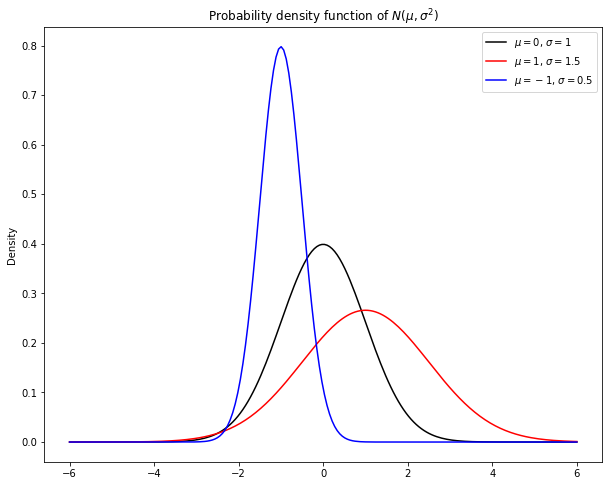

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
# Calculate the probability density function for values of x in [-6;6]
x = np.linspace(start = -6, stop = 6, num = 200)
#
_ = plt.figure(num = 0, figsize = (10, 8))
_ = plt.plot(x, norm.pdf(x, loc = 0, scale = 1), color = "black", 
         label = "$\\mu=0$, $\sigma =1$")
_ = plt.plot(x, norm.pdf(x, loc = 1, scale = 1.5), color = "red", 
         label = "$\\mu=1$, $\sigma =1.5$")
_ = plt.plot(x, norm.pdf(x, loc = -1, scale = 0.5), color = "blue", 
         label = "$\\mu=-1$, $\sigma =0.5$")
_ = plt.title("Probability density function of $N(\\mu, \\sigma^2)$")
_ = plt.ylabel("Density")
_ = plt.legend()
plt.show()

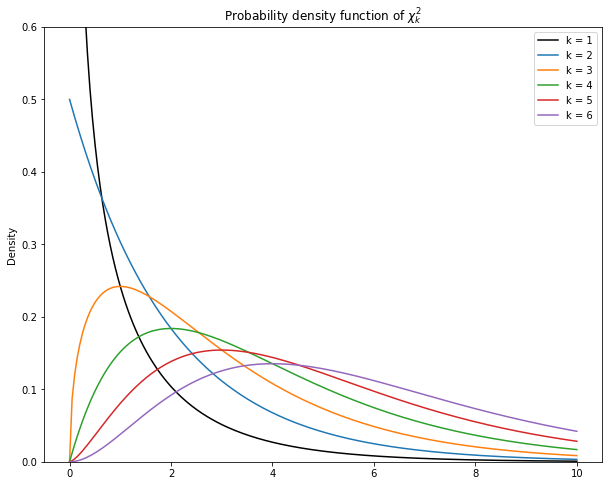

In [50]:
from scipy.stats import chi2
# Calculate the probability density function for values of x in [0;10]
x = np.linspace(start = 0, stop = 10, num = 200)
#
_ = plt.figure(num = 1, figsize = (10, 8))
_ = plt.plot(x, chi2.pdf(x, df = 1), color = "black", label = "k = 1")
for i in range(2, 7):
    _ = plt.plot(x, chi2.pdf(x, df = i), label = "k = " + str(i))
_ = plt.ylim((0, 0.6))    
_ = plt.title("Probability density function of $\\chi^2_k$")
_ = plt.ylabel("Density")
_ = plt.legend()
plt.show()

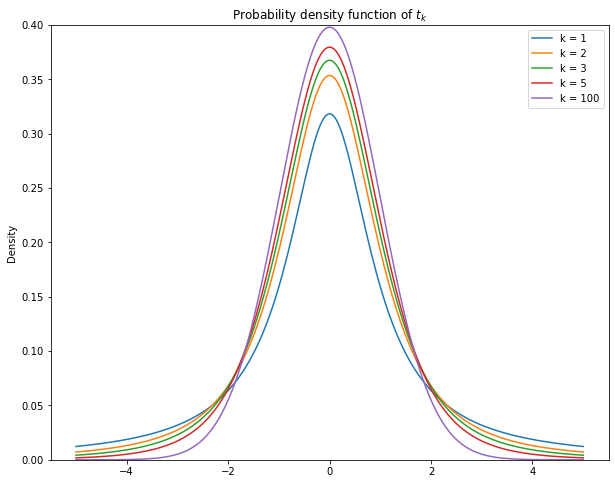

In [51]:
from scipy.stats import t
# Calculate the probability density function for values of x in [-5;5]
x = np.linspace(start = -5, stop = 5, num = 200)
#
_ = plt.figure(num = 2, figsize = (10, 8))
for i in range(0, 5):
    _ = plt.plot(x, t.pdf(x, df = [1, 2, 3, 5, 100][i]), 
              label = "k = " + str([1, 2, 3, 5, 100][i]))
_ = plt.ylim((0, 0.4))    
_ = plt.title("Probability density function of $t_k$")
_ = plt.ylabel("Density")
_ = plt.legend()
plt.show()

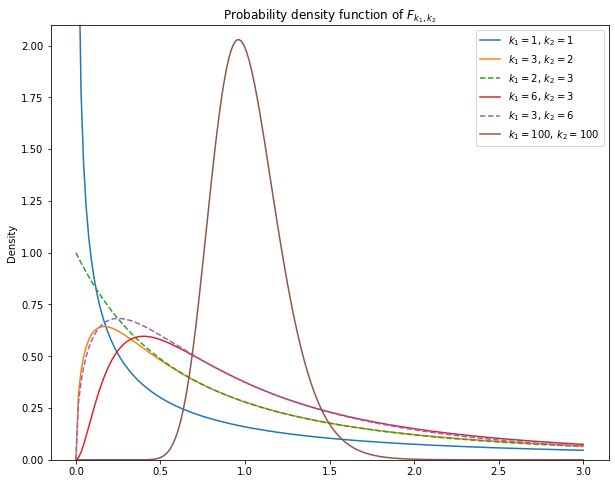

In [52]:
from scipy.stats import f
# Calculate the probability density function for values of x in [0;3]
x = np.linspace(start = 1e-10, stop = 3, num = 200)
#
_ = plt.figure(num = 3, figsize = (10, 8))
#
_ = plt.plot(x, f.pdf(x, dfn = 1, dfd = 1), label = "$k_1 = 1$, $k_2 = 1$")
_ = plt.plot(x, f.pdf(x, dfn = 3, dfd = 2), label = "$k_1 = 3$, $k_2 = 2$")
_ = plt.plot(x, f.pdf(x, dfn = 2, dfd = 3), 
         linestyle = "--", label = "$k_1 = 2$, $k_2 = 3$")
_ = plt.plot(x, f.pdf(x, dfn = 6, dfd = 3), label = "$k_1 = 6$, $k_2 = 3$")
_ = plt.plot(x, f.pdf(x, dfn = 3, dfd = 6), 
         linestyle = "--", label = "$k_1 = 3$, $k_2 = 6$")
_ = plt.plot(x, f.pdf(x, dfn = 100, dfd = 100), label = "$k_1 = 100$, $k_2 = 100$")
#
_ = plt.ylim((0, 2.1))    
_ = plt.title("Probability density function of $F_{k_1, k_2}$")
_ = plt.ylabel("Density")
#
_ = plt.legend()
plt.show()

In [53]:
import numpy as np
import matplotlib.pyplot as plt
#
np.random.seed(123)
#
N = 200
beta_0 = 1
beta_1 = 0.5
e_sd = 0.5
#
x = np.linspace(start = -10, stop = 10, num = N)
e = np.random.normal(loc = 0, scale = e_sd, size = len(x))
y = beta_0 + beta_1 * x + e
y_cond_exp = beta_0 + beta_1 * x
# Fit the data
#y_mdl = sm.OLS(y, sm.add_constant(x)).fit()
# Plot the density at specified X axis points:
plot_at = [-5, 0, 5]

In [54]:
from scipy.stats import norm
#
def sideways_dnorm(where_x, where_y, e_var, magnify = 4):
    values = np.arange(start = -2, stop = 2.1, step = 0.1) # calculate density for this interval
    # Y|X ~ Normal(XB, sigma^2)
    # (Y - XB)|X ~ Normal(0, sigma^2)
    dens = norm.pdf(x = values, loc = 0, scale = np.sqrt(e_var))
    x = where_x + dens * np.array(magnify)
    y = where_y + values
    return(np.vstack((x, y)))

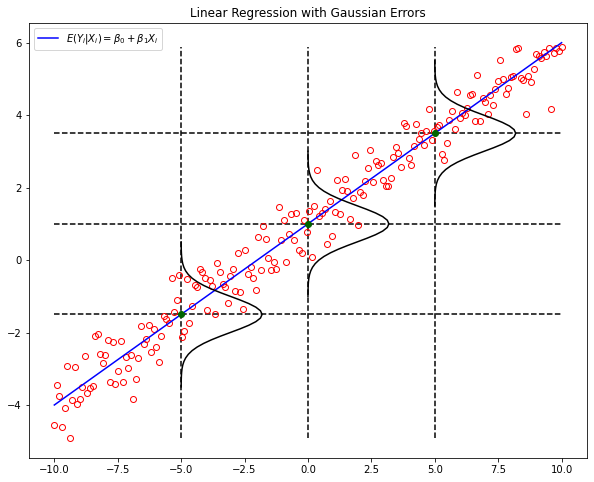

In [55]:
_ = plt.figure(num = 4, figsize = (10, 8))
_ = plt.plot(x, y, linestyle = "None", marker = "o", 
         color = "red", markerfacecolor = 'None')
_ = plt.title("Linear Regression with Gaussian Errors")         
#plt.plot(x, y_mdl.fittedvalues, linestyle = "-", color = "blue")
_ = plt.plot(x, y_cond_exp, linestyle = "-", color = "blue", 
        label = "$E(Y_i|X_i) = \\beta_0 + \\beta_1 X_i$")
for i in range(0, len(plot_at)):
    # y_fit = y_mdl.params[0] + y_mdl.params[1] * plot_at[i]
    y_fit = beta_0 + beta_1 * plot_at[i]
    xy = sideways_dnorm(where_x = plot_at[i],
                       where_y = y_fit,
                       e_var = e_sd**2,#np.var(y_mdl.resid),
                       magnify = 4)
    _ = plt.plot(xy[0], xy[1], linestyle = "-", color = "black")
    _ = plt.hlines(y = y_fit, linestyle = "--", 
               color = "black", xmin = min(x), xmax = max(x))
    _ = plt.vlines(x = plot_at[i], linestyle = "--", 
               color = "black", ymin = min(y), ymax = max(y))
    _ = plt.plot(plot_at[i], y_fit, linestyle = "None", 
             marker = "o", color = "darkgreen")
_ = plt.legend()
plt.show()

In [56]:
np.random.seed(123)
#
N = 100
beta_0 = 3
beta_1 = 8
#
X = np.random.normal(loc = 10, scale = 2, size = N)
e = np.random.normal(loc = 0, scale = 2, size = len(X))
Y = beta_0 + beta_1 * X + e

In [57]:
def log_lik(par_vec, y, x):
    # If the standard deviation prameter is negative, return a large value:
    if par_vec[2] < 0:
        return(1e8)
    # The likelihood function values:
    lik = norm.pdf(y, 
                   loc = par_vec[0] + par_vec[1] * x, 
                   scale = par_vec[2])
    #This is similar to calculating the likelihood for Y - XB
    # res = y - par_vec[0] - par_vec[1] * x
    # lik = norm.pdf(res, loc = 0, sd = par_vec[2])
    
    # If all logarithms are zero, return a large value
    if all(v == 0 for v in lik):
        return(1e8)
    # Logarithm of zero = -Inf
    return(-sum(np.log(lik[np.nonzero(lik)])))

In [58]:
import scipy.optimize as optimize
#
opt_res = optimize.minimize(fun = log_lik, 
                            x0 = [0, 0, 10], 
                            args = (Y, X))
print(opt_res)

      fun: 208.14955038268332
 hess_inv: array([[ 0.01966864, -0.00222491, -0.01058009],
       [-0.00222491,  0.00043398,  0.00116553],
       [-0.01058009,  0.00116553,  0.00607384]])
      jac: array([1.90734863e-06, 1.90734863e-05, 1.90734863e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 206
      nit: 26
     njev: 41
   status: 2
  success: False
        x: array([3.12775369, 7.98340748, 1.93974587])


In [59]:
print(opt_res.x)

[3.12775369 7.98340748 1.93974587]


In [60]:
print(np.sqrt(np.diag(opt_res.hess_inv)))

[0.14024492 0.02083224 0.07793484]


In [61]:
import statsmodels.api as sm
#
print(sm.OLS(Y, sm.add_constant(X)).fit().params)

[3.12775395 7.98340745]


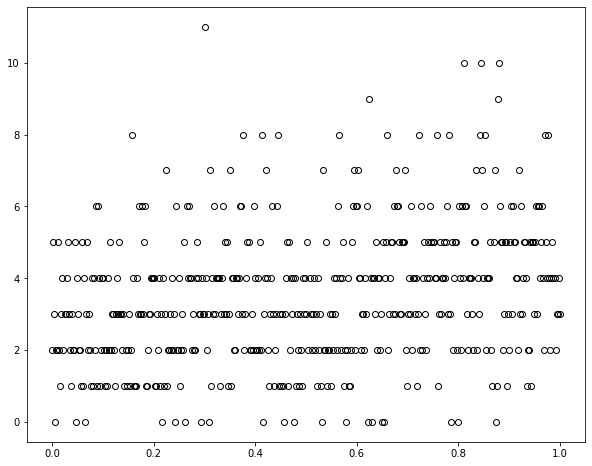

In [62]:
np.random.seed(123)
#
N = 500
beta_0 = 1
beta_1 = 0.5
#
x = np.linspace(start = 0, stop = 1, num = N)
mu = np.exp(beta_0 + beta_1 * x)
y = np.random.poisson(lam = mu, size = N)
#
_ = plt.figure(num = 5, figsize = (10, 8))
_ = plt.plot(x, y, linestyle = "None", marker = "o",
         markerfacecolor = "None", color = "black")
plt.show()

In [63]:
from scipy.stats import poisson
#
def log_lik(par_vec, y, x):
    # The likelihood function values:
    lik = poisson.pmf(y, mu = np.exp(par_vec[0] + par_vec[1] * x))
    # If all logarithms are zero, return a large value
    if all(v == 0 for v in lik):
        return(1e8)
    # Logarithm of zero = -Inf
    return(-sum(np.log(lik[np.nonzero(lik)])))

In [64]:
opt_res = optimize.minimize(fun = log_lik, 
                            x0 = [0, 0], 
                            args = (y, x))
print(opt_res)

      fun: 1005.4483712482823
 hess_inv: array([[ 0.00220448, -0.00290154],
       [-0.00290154,  0.00387628]])
      jac: array([-5.34057617e-05, -4.57763672e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 262
      nit: 12
     njev: 63
   status: 2
  success: False
        x: array([0.97663589, 0.52574926])


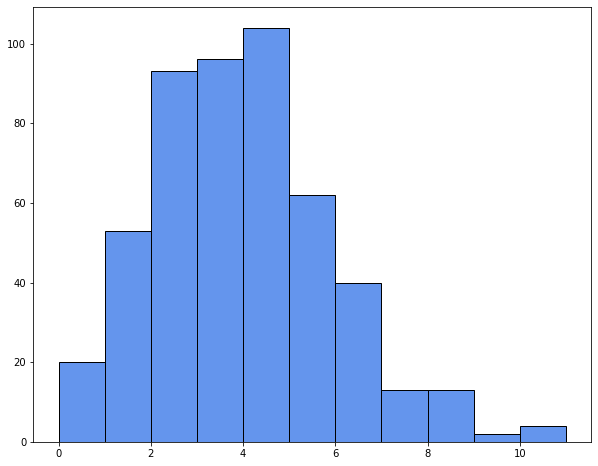

In [65]:
_ = plt.figure(num = 6, figsize = (10, 8))
_ = plt.hist(y, bins = 11, histtype = 'bar', color = "cornflowerblue", ec = 'black')
plt.show()

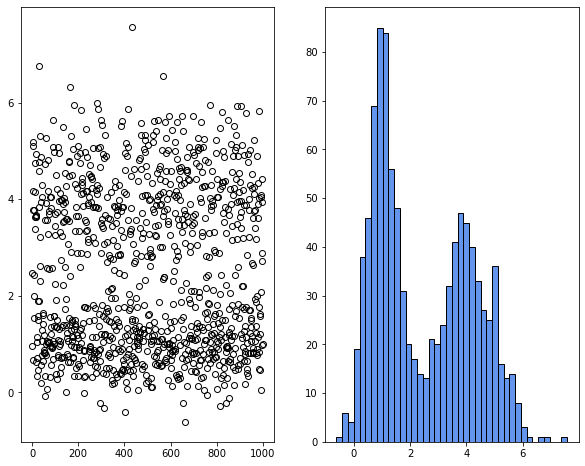

In [66]:
np.random.seed(123)
#
N = 500
x1 = np.random.normal(loc = 1, scale = 0.5, size = N)
x2 = np.random.normal(loc = 4, scale = 1, size = N)
# randomize the ordering of x1 and x2 variables
y = np.concatenate((x1, x2))
np.random.shuffle(y)
# plot the data
fig = plt.figure(num = 7, figsize = (10, 8))
_ = fig.add_subplot('121').plot(y, color = "black", 
        linestyle = "None", marker = "o", markerfacecolor = 'None')
_ = fig.add_subplot('122').hist(y, bins = 40, 
                            color = "cornflowerblue", ec = 'black')
plt.show()

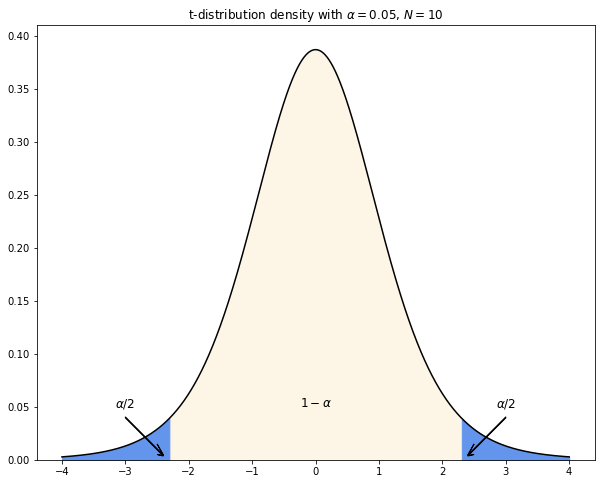

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
#
N = 10
x = np.linspace(start = -4, stop = 4, num = int(1e5))
hx = stats.t.pdf(x, df = N - 2)
# Get the critical values for the specified probability:
crit_vals = stats.t.ppf(q = 0.05 / 2, df = N-2)
# Plot the density
_ = plt.figure(num = 1, figsize=(10, 8))
_ = plt.plot(x, hx, color = "black")
_ = plt.margins(y = 0)
_ = plt.ylim((0, 0.41))
# Shade in the relevant parts of the density
_ = plt.fill_between(x[np.logical_and(x >= crit_vals, x <= -crit_vals)], 
                 hx[np.logical_and(x >= crit_vals, x <= -crit_vals)], 
                 color = "oldlace")
_ = plt.fill_between(x[x <= crit_vals], hx[x <= crit_vals], color = "cornflowerblue")
_ = plt.fill_between(x[x >= -crit_vals], hx[x >= -crit_vals], color = "cornflowerblue")
#
_ = plt.title("t-distribution density with $\\alpha = 0.05$, $N=10$")
#
_ = plt.text(0, 0.05, '$1-\\alpha$', fontsize = 12, ha = "center")
_ = plt.text(-3, 0.05, '$\\alpha/2$', fontsize = 12, ha = "center")
_ = plt.text(3, 0.05, '$\\alpha/2$', fontsize = 12, ha = "center")
_ = plt.arrow(-3, 0.04, -2.5-(-3), 0.01 - 0.04, color = "black", 
          head_width=0.01, head_length=0.1, overhang = 1)
_ = plt.arrow(3, 0.04, 2.5-3, 0.01 - 0.04, color = "black", 
          head_width=0.01, head_length=0.1, overhang = 1)
plt.show()

In [68]:
np.random.seed(123)
#
N = 100
beta_0 = 2
beta_1 = 0.4
#
x = np.linspace(start = 0, stop = 20, num = N)
e = np.random.normal(loc = 0, scale = 2, size = N)
y = beta_0 + beta_1 * x + e

In [69]:
import pandas as pd
# Manual Calculation
#  Estimate the parameters:
x_mat = np.column_stack((np.ones(len(x)), x))
xtx = np.dot(np.transpose(x_mat), x_mat)
xty = np.dot(np.transpose(x_mat), y)
beta_mat_est = np.dot(np.linalg.inv(xtx), xty)
#  Calculate model fit:
y_fit = beta_mat_est[0] + beta_mat_est[1] * x
#  Calculate the residuals:
resid = y - y_fit
#  Estimate the standard errors:
sigma2_est = sum(resid**2) / (len(x) - 2)
var_beta = sigma2_est * np.linalg.inv(np.dot(np.transpose(x_mat), x_mat))
std_err = np.sqrt(np.diag(var_beta))
#  Calculate the confidence intervals:
lower = beta_mat_est - stats.t.ppf(q = 1 - 0.05 / 2, df = N-2) * std_err
upper = beta_mat_est + stats.t.ppf(q = 1 - 0.05 / 2, df = N-2) * std_err
#  Print the output
print(pd.DataFrame(np.column_stack([beta_mat_est, std_err]),
                   columns = ["estimate", "s.e."], index = ["b0", "b1"]))


    estimate      s.e.
b0  2.026150  0.452468
b1  0.402807  0.039086


In [70]:
print(pd.DataFrame(np.column_stack([lower, upper]), 
                   columns = ["lower", "upper"],index=['b0','b1']))

       lower     upper
b0  1.128242  2.924059
b1  0.325241  0.480372


In [71]:
import statsmodels.api as sm
#
# Automatic calculation
lm_fit = sm.OLS(y, x_mat).fit()
# dir(lm_fit)
# Get the summary table with coefficients and other statistics
df = pd.DataFrame(lm_fit.summary().tables[1].data)
# Select first row as column names:
df.columns = df.iloc[0, :]
# Select first column as row names
df.index = df.iloc[:, 0]
# Remove the first (i.e. 0th) column and first row
df = df.iloc[1:, 1:]
# Print relevant info only
print(df.iloc[:,[0, 1, 4, 5]])

0            coef    std err     [0.025     0.975]
                                                  
const      2.0262      0.452      1.128      2.924
x1         0.4028      0.039      0.325      0.480


In [72]:
# Let's calculate the mean resposne (i.e. fitted) values again:
x_new  = x_mat
y_fit = np.dot(x_new,  beta_mat_est)
#  Calculate mean resposne SE:
ym_se = np.dot(np.dot(x_new, var_beta), np.transpose(x_new))
ym_se = np.sqrt(np.diag(ym_se))
# Confidence intervals for the MEAN resposne of Y:
ym_lower = y_fit - stats.t.ppf(q = 1 - 0.05 / 2, df = N-2) * ym_se
ym_upper = y_fit + stats.t.ppf(q = 1 - 0.05 / 2, df = N-2) * ym_se
print(pd.DataFrame(np.column_stack([y_fit, ym_lower, ym_upper])).head())

          0         1         2
0  2.026150  1.128242  2.924059
1  2.107526  1.223118  2.991933
2  2.188901  1.317922  3.059880
3  2.270276  1.412649  3.127902
4  2.351651  1.507297  3.196005


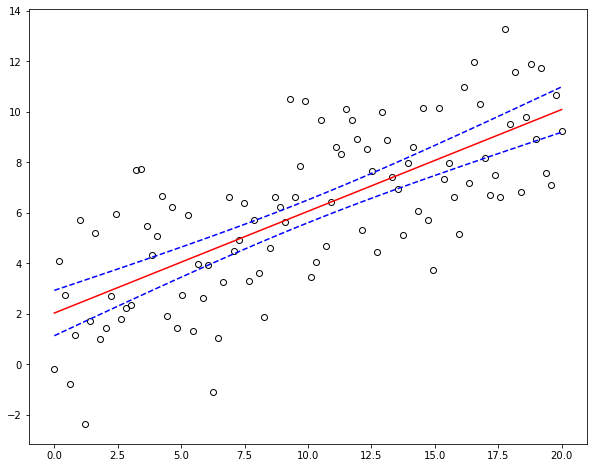

In [73]:
_ = plt.figure(num = 2, figsize=(10, 8))
_ = plt.plot(x, y, linestyle = "None", marker = "o",
         markerfacecolor = "None", color = "black")
_ = plt.plot(x, y_fit, color = "red")
_ = plt.plot(x, ym_lower, color = "blue", linestyle = "--")
_ = plt.plot(x, ym_upper, color = "blue", linestyle = "--")
plt.show()

In [74]:
from statsmodels.stats.outliers_influence import summary_table
#
# Automatically:
dt = summary_table(lm_fit, alpha = 0.05)[1]
y_fit = dt[:, 2]
ym_ci_lower, ym_ci_upper = dt[:, 4:6].T
print(pd.DataFrame(np.column_stack([y_fit, ym_ci_lower, ym_ci_upper])).head())

          0         1         2
0  2.026150  1.128242  2.924059
1  2.107526  1.223118  2.991933
2  2.188901  1.317922  3.059880
3  2.270276  1.412649  3.127902
4  2.351651  1.507297  3.196005


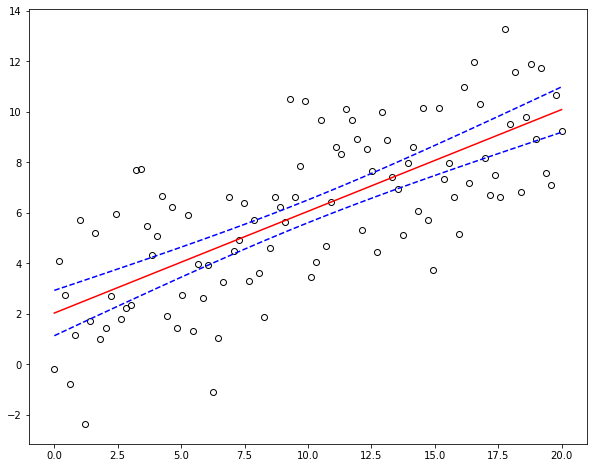

In [75]:
# Plot the CI's:
_ = plt.figure(num = 3, figsize=(10, 8))
_ = plt.plot(x, y, linestyle = "None", marker = "o",
         markerfacecolor = "None", color = "black")
_ = plt.plot(x, y_fit, color = "red")
_ = plt.plot(x, ym_ci_lower, color = "blue", linestyle = "--")
_ = plt.plot(x, ym_ci_upper, color = "blue", linestyle = "--")
plt.show()

In [76]:
# Automatically:
y_prd = lm_fit.get_prediction(sm.add_constant([-2, 50]))
#
print(y_prd.summary_frame(alpha = 0.05).T)

                      0          1
mean           1.220537  22.166489
mean_se        0.521486   1.579980
mean_ci_lower  0.185664  19.031069
mean_ci_upper  2.255410  25.301908
obs_ci_lower  -3.419593  16.662790
obs_ci_upper   5.860667  27.670188


In [77]:
NN = [10, 100, 1000, 1e5, 1e6]
for i in range(0, len(NN)):
    print("N = " + str(NN[i]) + " crit.val. = " +
          str(np.round(stats.t.ppf(q = 1 - 0.05 / 2, df = NN[i]), 4)))
#   

N = 10 crit.val. = 2.2281
N = 100 crit.val. = 1.984
N = 1000 crit.val. = 1.9623
N = 100000.0 crit.val. = 1.96
N = 1000000.0 crit.val. = 1.96


In [78]:
import scipy.stats as stats
#
N = 100
t_crit = stats.t.ppf(q = 1 - 0.05, df = N - 2)
print(t_crit)

1.6605512170440568


In [79]:
import numpy as np
import scipy.integrate as integrate
# Our calculated t-statistic in this example:
t_stat = 2.5
# The density function of the statistic under the null:
def dF(x, df):
    return(stats.t.pdf(x, df = N - 2))
#
# The associated p-value:
p_val = 1 - integrate.quad(dF, a = -np.inf, b = t_stat, args = N - 2)[0]
print(p_val)

0.00703987768735348


In [80]:
print(stats.t.sf(x = t_stat, df = N-2))

0.007039877687385987


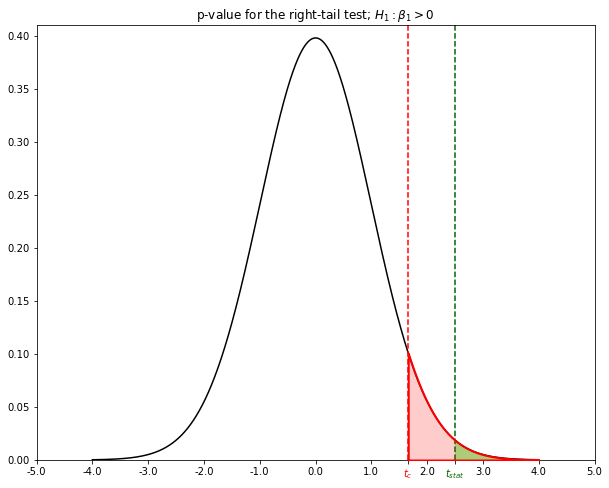

In [81]:
import matplotlib.colors as clrs
#
x = np.linspace(start = -4, stop = 4, num = int(1e5))
hx = stats.t.pdf(x, df = N - 2)
# Plot the density
fig, ax = plt.subplots(num = 0, figsize = (10, 8))
_ = plt.plot(x, hx, color = "black")
_ = plt.margins(y = 0)
_ = plt.ylim((0, 0.41))
# Shade the probability alpha
_ = plt.fill_between(x[x >= t_crit], hx[x >= t_crit], 
                 edgecolor = "red", linestyle = "-", linewidth = 2,
                 facecolor = clrs.to_rgba(c = (1, 0, 0, 0.2)), zorder = 10)
# plot the critical value t_c:
_ = plt.axvline(x = t_crit, color = "red", linestyle = "--")
# Shade the probability p-value
_ = plt.fill_between(x[x >= t_stat], hx[x >= t_stat], edgecolor = None,
                 color = clrs.to_rgba(c = (0, 1, 0, 0.4)))
# plot the observed t-statictic:
_ = plt.axvline(x = t_stat, color = "darkgreen", linestyle = "--")
#
xt = np.append(ax.get_xticks(), [t_crit, t_stat])
xtl = xt.tolist()
xtl[-2:] = ["$t_c$", "$t_{stat}$"]
_ = ax.set_xticks(xt)
_ = ax.set_xticklabels(xtl)
ax.get_xticklabels()[-2].set_color("red")
ax.get_xticklabels()[-1].set_color("darkgreen")
_ = plt.title("p-value for the right-tail test; $H_1: \\beta_1 > 0$")
plt.show()

In [82]:
N = 100
t_crit = stats.t.ppf(q = 0.05, df = N - 2)
print(t_crit)

-1.6605512170440575


In [83]:
# Our calculated t-statistic in this example:
t_stat = -2.5
# The density function of the statistic under the null:
def dF(x, df):
    return(stats.t.pdf(x, df = N - 2))
#
# The associated p-value:
p_val = integrate.quad(dF, a = -np.inf, b = t_stat, args = N - 2)[0]
print(p_val)

0.0070398776873863665


In [84]:
print(stats.t.cdf(x = t_stat, df = N - 2))

0.007039877687385987


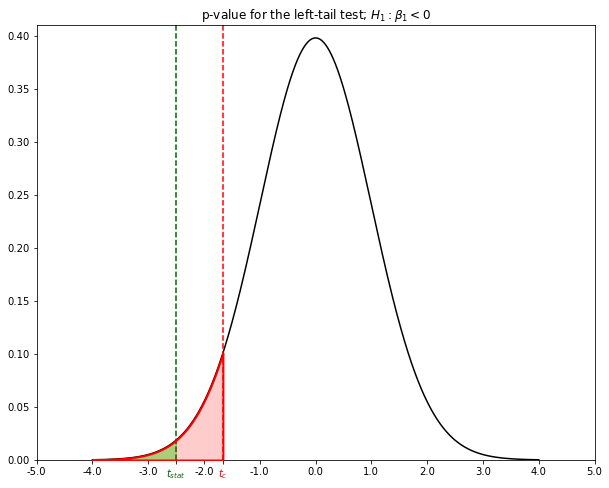

In [85]:
x = np.linspace(start = -4, stop = 4, num = int(1e5))
hx = stats.t.pdf(x, df = N - 2)
# Plot the density
fig, ax = plt.subplots(num = 1, figsize = (10, 8))
_ = plt.plot(x, hx, color = "black")
_ = plt.margins(y = 0)
_ = plt.ylim((0, 0.41))
# Shade the probability alpha
_ = plt.fill_between(x[x <= t_crit], hx[x <= t_crit], 
                 edgecolor = "red", linestyle = "-", linewidth = 2,
                 facecolor = clrs.to_rgba(c = (1, 0, 0, 0.2)), zorder = 10)
# plot the critical value t_c:
_ = plt.axvline(x = t_crit, color = "red", linestyle = "--")
# Shade the probability p-value
_ = plt.fill_between(x[x <= t_stat], hx[x <= t_stat], edgecolor = None,
                 color = clrs.to_rgba(c = (0, 1, 0, 0.4)))
# plot the observed t-statictic:
_ = plt.axvline(x = t_stat, color = "darkgreen", linestyle = "--")
#
xt = np.append(ax.get_xticks(), [t_crit, t_stat])
xtl = xt.tolist()
xtl[-2:] = ["$t_c$", "$t_{stat}$"]
_ = ax.set_xticks(xt)
_ = ax.set_xticklabels(xtl)
ax.get_xticklabels()[-2].set_color("red")
ax.get_xticklabels()[-1].set_color("darkgreen")
_ = plt.title("p-value for the left-tail test; $H_1: \\beta_1 < 0$")
plt.show()

In [86]:
N = 100
print(stats.t.ppf(q = 1 - 0.05 / 2, df = N - 2))

1.984467454426692


In [87]:
t_crit = stats.t.ppf(q = 0.05 / 2, df = N - 2)
print(t_crit)

-1.9844674544266925


In [88]:
# Our calculated t-statistic in this example:
t_stat = -1
# The density function of the statistic under the null:
def dF(x, df):
    return(stats.t.pdf(x, df = N - 2))
#
# The associated p-value:
p_val = 1 - integrate.quad(dF, a = -np.abs(t_stat), b = np.abs(t_stat), args = N - 2)[0]
print(p_val)

0.3197732875085676


In [89]:
p_val = 2 * integrate.quad(dF, a = -np.inf, b = -np.abs(t_stat), args = N - 2)[0]
print(p_val)

0.3197732875085983


In [90]:
print(2 * stats.t.cdf(x = -np.abs(t_stat), df = N - 2))

0.3197732875085884


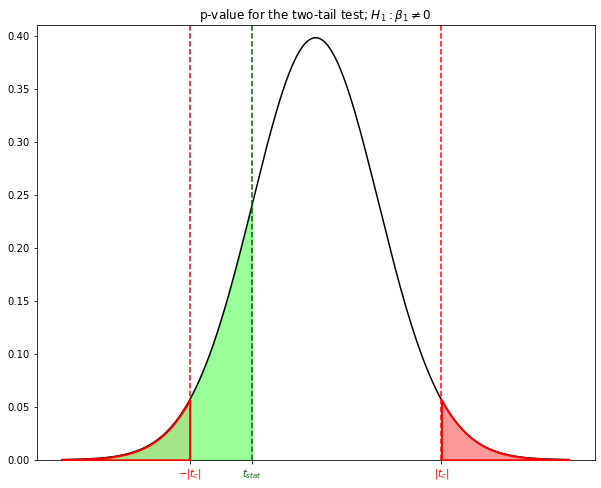

In [91]:
x = np.linspace(start = -4, stop = 4, num = int(1e5))
hx = stats.t.pdf(x, df = N - 2)
# Plot the density
fig, ax = plt.subplots(num = 2, figsize = (10, 8))
_ = plt.plot(x, hx, color = "black")
_ = plt.margins(y = 0)
_ = plt.ylim((0, 0.41))
# Shade the probability p-value
_ = plt.fill_between(x[x <= t_stat], hx[x <= t_stat], edgecolor = None,
                 color = clrs.to_rgba(c = (0, 1, 0, 0.4)))
# plot the observed t-statictic:
_ = plt.axvline(x = t_stat, color = "darkgreen", linestyle = "--")
# Shade the probability alpha / 2
_ = plt.fill_between(x[x <= -np.abs(t_crit)], hx[x <= -np.abs(t_crit)], 
                 edgecolor = "red", linestyle = "-", linewidth = 2,
                 facecolor = clrs.to_rgba(c = (1, 0, 0, 0.1)), zorder = 10)
# Shade the probability 1 - alpha / 2
_ = plt.fill_between(x[x >= np.abs(t_crit)], hx[x >= np.abs(t_crit)], 
                 edgecolor = "red", linestyle = "-", linewidth = 2,
                 facecolor = clrs.to_rgba(c = (1, 0, 0, 0.4)), zorder = 10)
# plot the critical value -|t_c| and t_c|:
_ = plt.axvline(x = -np.abs(t_crit), color = "red", linestyle = "--")
_ = plt.axvline(x = np.abs(t_crit), color = "red", linestyle = "--")
#
_ = ax.set_xticks([-np.abs(t_crit), t_stat, np.abs(t_crit)])
_ = ax.set_xticklabels(["$-|t_c|$", "$t_{stat}$", "$|t_c|$"])
ax.get_xticklabels()[0].set_color("red")
ax.get_xticklabels()[1].set_color("darkgreen")
ax.get_xticklabels()[2].set_color("red")
_ = plt.title("p-value for the two-tail test; $H_1: \\beta_1 \\neq 0$")
plt.show()

In [92]:
import numpy as np
#
np.random.seed(123)
#
N = 100
beta_0 = 4
beta_1 = -2
#
x = np.random.normal(loc = 2, scale = 2, size = N)
e = np.random.normal(loc = 0, scale = 1, size = N)
z = np.random.normal(loc = 4, scale = 3, size = N)
y = beta_0 + beta_1 * x + e

In [93]:
import pandas as pd
#
#  Estimate the parameters:
x_mat = np.column_stack((np.ones(len(x)), x))
xtx = np.dot(np.transpose(x_mat), x_mat)
xty = np.dot(np.transpose(x_mat), y)
beta_mat_est = np.dot(np.linalg.inv(xtx), xty)
#  Calculate model fit:
y_fit = beta_mat_est[0] + beta_mat_est[1] * x
#  Calculate the residuals:
resid = y - y_fit
#  Estimate the standard errors:
sigma2_est = sum(resid**2) / (len(x) - 2)
var_beta = sigma2_est * np.linalg.inv(np.dot(np.transpose(x_mat), x_mat))
std_err = np.sqrt(np.diag(var_beta))
# Print the values:
print(pd.DataFrame(np.column_stack([beta_mat_est, std_err]), 
                   columns = ["estimates", "se"], index = ["b0", "b1"]))


    estimates        se
b0   3.997507  0.132489
b1  -2.008296  0.043418


In [94]:
t_stat = beta_mat_est / std_err
print(t_stat)

[ 30.17232824 -46.25488965]


In [95]:
tc_g = stats.t.ppf(q = 1 - 0.05, df = N-2)
print(pd.DataFrame(t_stat >= tc_g, columns = ["reject_H0"], 
                   index = ["b0", "b1"]))

    reject_H0
b0       True
b1      False


In [96]:
print(stats.t.sf(x = tc_g, df = N-2))

0.050000000002184096


In [97]:
print(stats.t.sf(x = t_stat, df = N-2))

[1.04385101e-51 1.00000000e+00]


In [98]:
tc_l = stats.t.ppf(q = 0.05, df = N-2)
p_val_l = stats.t.cdf(x = t_stat, df = N-2)
print(pd.DataFrame([t_stat <= tc_l, p_val_l], index = ["reject_H0", "p_value"], 
                   columns = ["b0", "b1"]).T)

   reject_H0      p_value
b0     False            1
b1      True  1.10985e-68


In [99]:
r1 = np.logical_or(t_stat >= tc_g, t_stat <= tc_l)
r2 = 2 * stats.t.cdf(x = -np.abs(t_stat), df = N-2)
print(pd.DataFrame([r1, r2,], index = ["reject_H0", "p_value"], 
                   columns = ["b0", "b1"]).T)

   reject_H0     p_value
b0      True  2.0877e-51
b1      True  2.2197e-68


In [100]:
import statsmodels.api as sm
#
lm_fit = sm.OLS(y, x_mat).fit()
df = pd.DataFrame(lm_fit.summary().tables[1].data)
print(df.iloc[:, 0:5])

       0           1          2          3       4
0               coef    std err          t   P>|t|
1  const      3.9975      0.132     30.172   0.000
2     x1     -2.0083      0.043    -46.255   0.000


In [101]:
print(lm_fit.pvalues)

[2.08770202e-51 2.21969545e-68]


In [102]:
lm_fit = sm.OLS(y, sm.add_constant(z)).fit()
df = pd.DataFrame(lm_fit.summary().tables[1].data)
print(df.iloc[:, 0:5])

       0           1          2          3       4
0               coef    std err          t   P>|t|
1  const     -0.5050      0.758     -0.666   0.507
2     x1      0.1015      0.161      0.632   0.529


In [103]:
np.random.seed(123)
#
N = 150
beta_0 = 3
beta_1 = 15
#
x = np.linspace(start = 0, stop = 1, num = N)
e = np.random.normal(loc = 0, scale = 1, size = N)
y = beta_0 + beta_1 * x + e
#Print the model output:
lm_fit = sm.OLS(y, sm.add_constant(x)).fit()
print(lm_fit.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9658      0.178     16.648      0.000       2.614       3.318
x1            15.1841      0.308     49.293      0.000      14.575      15.793


In [104]:
# Get the standard errors:
b1se = lm_fit.bse[1]
# Calculate one sided test statistic with H1: b1 < 10
t_stat = (lm_fit.params[1] - 10) / b1se
h1 = stats.t.cdf(x = t_stat, df = N-2)
print("with H1: b1 < 10; p-value = " + str(h1))

with H1: b1 < 10; p-value = 1.0


In [105]:
t_stat = (lm_fit.params[1] - 10) / b1se
h1 = stats.t.sf(x = t_stat, df = N-2)
print("with H1: b1 > 10; p-value = " + str(h1))

with H1: b1 > 10; p-value = 1.7218152704098086e-36


In [106]:
t_stat = (lm_fit.params[1] - 15) / b1se
h1 = stats.t.cdf(x = t_stat, df = N-2)
print("with H1: b1 < 15; p-value = " + str(h1))

with H1: b1 < 15; p-value = 0.724479892279916


In [107]:
t_stat = (lm_fit.params[1] - 16) / b1se
h1 = stats.t.cdf(x = t_stat, df = N-2)
print("with H1: b1 < 16; p-value = " + str(h1))

with H1: b1 < 16; p-value = 0.0044774462857780405


In [108]:
# Calculate the p-values for different one sided tests for H1: b1 > i
for i in range(10, 21):
    t_stat = (lm_fit.params[1] - i) / b1se
    h1 = stats.t.sf(x = t_stat, df = N-2)
    print("H0: b1 = "+ str(i) + 
          " against H1: b1 > " + str(i) + "; p-value = " + str(h1))   

H0: b1 = 10 against H1: b1 > 10; p-value = 1.7218152704098086e-36
H0: b1 = 11 against H1: b1 > 11; p-value = 4.243084544151641e-28
H0: b1 = 12 against H1: b1 > 12; p-value = 1.7167165540847268e-19
H0: b1 = 13 against H1: b1 > 13; p-value = 2.552032927419153e-11
H0: b1 = 14 against H1: b1 > 14; p-value = 8.963697889091957e-05
H0: b1 = 15 against H1: b1 > 15; p-value = 0.27552010772008395
H0: b1 = 16 against H1: b1 > 16; p-value = 0.9955225537142219
H0: b1 = 17 against H1: b1 > 17; p-value = 0.9999999878277424
H0: b1 = 18 against H1: b1 > 18; p-value = 0.9999999999999998
H0: b1 = 19 against H1: b1 > 19; p-value = 1.0
H0: b1 = 20 against H1: b1 > 20; p-value = 1.0
